<a href="https://colab.research.google.com/github/Art9521/Art9521/blob/main/fakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Описание проекта: **Обнаружение фальшивых новостей**


**Введение**

Проект по обнаружению фальшивых новостей направлен на решение одной из наиболее актуальных проблем в области цифровых медиа — распространение ложной информации. Фальшивые новости могут оказывать серьезное влияние на общественное мнение, политические процессы и даже экономические рынки. Создание эффективной системы для автоматического обнаружения и классификации новостей как реальных или фальшивых может существенно снизить влияние дезинформации.

**Цель проекта**

Основной целью проекта является разработка многоязычной модели машинного обучения, которая может с высокой точностью определять, является ли новость реальной (REAL) или фальшивой (FAKE).

**Используемые методы и инструменты**:

1.  **Библиотеки:**
pandas, sklearn, sentence-transformers, matplotlib, seaborn

2.  **Векторизация текста:** SentenceTransformer

3.  **Модель классификации:** PassiveAggressiveClassifier

4.  **Оценка модели:** accuracy_score, confusion_matrix
5.  **GridSearchCV:** Используем GridSearchCV для поиска наилучших гиперпараметров модели, что должно улучшить точность

**Шаги проекта**

1.  **Сбор данных:** Загрузка и подготовка датасета с новостными статьями.
Предварительная обработка данных: Разделение данных на обучающую и тестовую выборки.
2.  **Векторизация текста:** Преобразование текстов в числовые векторы с использованием модели SentenceTransformer.
Обучение модели: Обучение модели PassiveAggressiveClassifier на векторизованных данных.
3.  **Оценка модели:** Оценка точности модели, построение и визуализация матрицы ошибок.
4.  **Пользовательский ввод:** Проверка новостей, введенных пользователем, с помощью обученной модели.

**Решаемая проблема**

Этот проект направлен на решение проблемы распространения фальшивых новостей. Он помогает автоматически выявлять и классифицировать ложные новости, что может быть полезно для:

Журналистов и редакторов, проверяющих достоверность источников.
Социальных платформ, стремящихся уменьшить дезинформацию.
Пользователей интернета, желающих проверить правдивость новостей.

In [2]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
import gdown
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import GridSearchCV
import time

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [4]:
# Скачивание файла с Google Drive
file_id = '1-ffH8B33DuoJ-lJXfp8IUjI9Q7FE2eGd'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'fake_news.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-ffH8B33DuoJ-lJXfp8IUjI9Q7FE2eGd
To: /content/fake_news.csv
100%|██████████| 30.7M/30.7M [00:00<00:00, 200MB/s]


'fake_news.csv'

In [5]:
# Проверка содержимого файла
with open(output, 'r') as file:
    lines = file.readlines()
    for line in lines[:10]:  # вывод первых 10 строк
        print(line)

,title,text,label

8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 

In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 

The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. 

But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. 

The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. 

In [6]:
df = pd.read_csv(output)

In [7]:
print(df.columns)

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [8]:
# Разделение данных на обучающую и тестовую выборки
X = df['text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# Использование многоязычной модели для векторизации текста
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Векторизация текстовых данных
start_time = time.time()
X_train_embeddings = model.encode(X_train.tolist(), show_progress_bar=True)
X_test_embeddings = model.encode(X_test.tolist(), show_progress_bar=True)
end_time = time.time()
print(f'Время, затраченное на векторизацию: {end_time - start_time} seconds')

# Инициализация и обучение классификатора с использованием GridSearchCV для повышения точности
param_grid = {
    'C': [0.1, 0.5, 1.0],
    'max_iter': [50, 100, 200]
}
grid = GridSearchCV(PassiveAggressiveClassifier(), param_grid, scoring='accuracy', cv=5)
start_time = time.time()
grid.fit(X_train_embeddings, y_train)
end_time = time.time()
print(f'Время, затраченное на обучение: {end_time - start_time} seconds')
print(f'Наилучшие параметры: {grid.best_params_}')

# Предсказания
y_pred = grid.predict(X_test_embeddings)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/159 [00:00<?, ?it/s]

Batches:   0%|          | 0/40 [00:00<?, ?it/s]

Время, затраченное на векторизацию: 719.0482375621796 seconds
Время, затраченное на обучение: 10.076157569885254 seconds
Наилучшие параметры: {'C': 0.1, 'max_iter': 200}


In [9]:
# Оценка модели
score = accuracy_score(y_test, y_pred)
print(f'Точность: {round(score*100,2)}%')
print(classification_report(y_test, y_pred))

Точность: 85.4%
              precision    recall  f1-score   support

        FAKE       0.90      0.80      0.85       638
        REAL       0.82      0.91      0.86       629

    accuracy                           0.85      1267
   macro avg       0.86      0.85      0.85      1267
weighted avg       0.86      0.85      0.85      1267



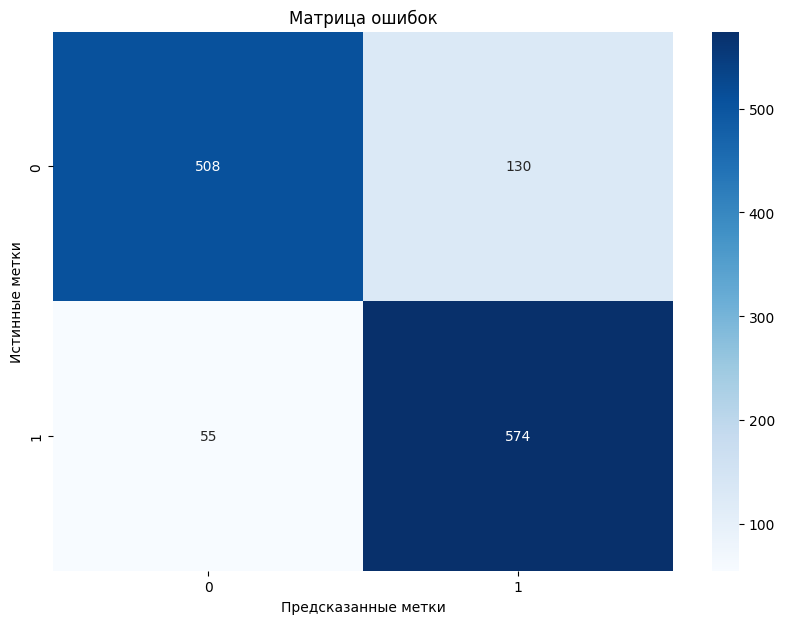

In [10]:
# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.title('Матрица ошибок')
plt.show()

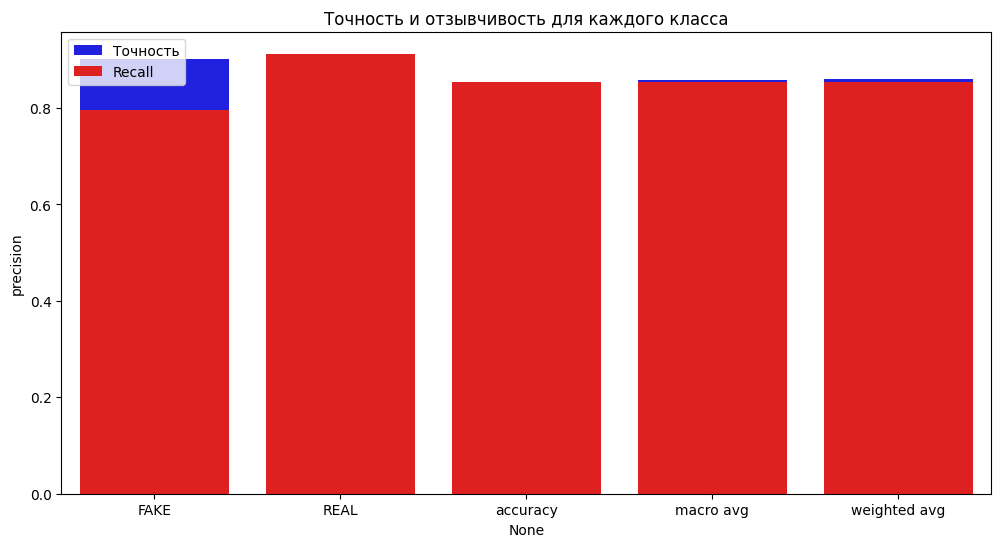

In [11]:
# Визуализация точности и полноты
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(12, 6))
sns.barplot(x=df_report.index, y='precision', data=df_report, color='blue', label='Точность')
sns.barplot(x=df_report.index, y='recall', data=df_report, color='red', label='Recall')
plt.legend()
plt.title('Точность и отзывчивость для каждого класса')
plt.show()

In [ ]:
# Функция для проверки новости от пользователя
def check_news(news):
    news_embedding = model.encode([news])
    prediction = grid.predict(news_embedding)
    return prediction[0]

# Пример использования функции
user_news = input("Введите текст новости для проверки: ")
result = check_news(user_news)
print(f'Новость является: {result}')

Введите текст новости для проверки: В Испании умерла первая жена Фиделя Кастро
Новость является: REAL
